In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

ModuleNotFoundError: No module named 'networkx'

In [ ]:
# Dijkstra
def dijkstra_with_predecessors(graph, start):
    times = {node: float('inf') for node in graph}
    times[start] = 0
    predecessors = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_time, node = heapq.heappop(queue)

        # Esta verificação é importante para evitar o processamento de entradas desatualizadas na fila de prioridade
        if current_time > times[node]:
            continue

        for neighbor, weight in graph[node]:
            time = current_time + weight
            if time < times[neighbor]:
                times[neighbor] = time
                predecessors[neighbor] = node
                heapq.heappush(queue, (time, neighbor))
    return times, predecessors

# RK4 (Runge-Kutta de 4ª Ordem)
def runge_kutta_4(f, y0, t0, tf, h):
    t = t0
    y = y0
    ts = [t0]
    ys = [y0]

    while t < tf:
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
        ts.append(t)
        ys.append(y)
    return ts, ys , y # retorna 3 para ter o ponto final para os gráficos (puro pulo do gato)

# Modelo de contaminação
def contamination_model(t,C):
        return -0.1*t*C

In [ ]:
import random

def generate_random_graph(num_nodes, max_edges_per_node, max_weight):
    """
    Gera um grafo aleatório com um número especificado de nós.

    Args:
        num_nodes: O número desejado de nós no grafo.
        max_edges_per_node: O número máximo de arestas de saída por nó.
        max_weight: O peso máximo para as arestas.

    Returns:
        Um dicionário representando o grafo onde as chaves são nós e os valores
        são listas de tuplas representando (vizinho, peso).
    """
    graph = {i: [] for i in range(num_nodes)}
    for i in range(num_nodes):
        # Garante que o número de arestas não exceda o número de outros nós
        num_edges = random.randint(0, min(max_edges_per_node, num_nodes - 1))
        neighbors = random.sample([j for j in range(num_nodes) if j != i], num_edges)
        for neighbor in neighbors:
            weight = random.randint(1, max_weight)
            graph[i].append((neighbor, weight))
    return graph

# Gera um grafo complexo aleatório
num_nodes = 10
max_edges_per_node = 3
max_weight = 5

random_complex_graph = generate_random_graph(num_nodes, max_edges_per_node, max_weight)

# Garante que pelo menos um nó não tenha arestas de saída (nó terminal)
while all(len(random_complex_graph[node]) > 0 for node in random_complex_graph):
     random_complex_graph = generate_random_graph(num_nodes, max_edges_per_node, max_weight)

# Garante que pelo menos um nó tenha múltiplas arestas de entrada (múltiplas conexões)
while all(sum(1 for node in random_complex_graph for edge in random_complex_graph[node] if edge[0] == target_node) < 2 for target_node in range(num_nodes) if target_node != 0):
     random_complex_graph = generate_random_graph(num_nodes, max_edges_per_node, max_weight)


# Seleciona um nó de origem aleatório
source_node = random.randint(0, num_nodes - 1)

# Executa Dijkstra para obter predecessores e tempos de chegada
contamination_times_random = dijkstra_with_predecessors(random_complex_graph, source_node)

print("Grafo complexo gerado aleatoriamente:")
print(random_complex_graph)
print("\nTempos de contaminação (minutos) para o grafo aleatório:")
for point, time in contamination_times_random[0].items():
    print(f"Ponto {point}: {time:.1f} min")

Grafo complexo gerado aleatoriamente:
{0: [(8, 5), (6, 5)], 1: [(5, 3), (2, 4), (8, 4)], 2: [(7, 1), (9, 5)], 3: [], 4: [(9, 2)], 5: [(1, 1), (8, 1), (4, 2)], 6: [], 7: [], 8: [(4, 2), (0, 3), (9, 2)], 9: [(4, 2)]}

Tempos de contaminação (minutos) para o grafo aleatório:
Ponto 0: 4.0 min
Ponto 1: 1.0 min
Ponto 2: 5.0 min
Ponto 3: inf min
Ponto 4: 2.0 min
Ponto 5: 0.0 min
Ponto 6: 9.0 min
Ponto 7: 6.0 min
Ponto 8: 1.0 min
Ponto 9: 3.0 min


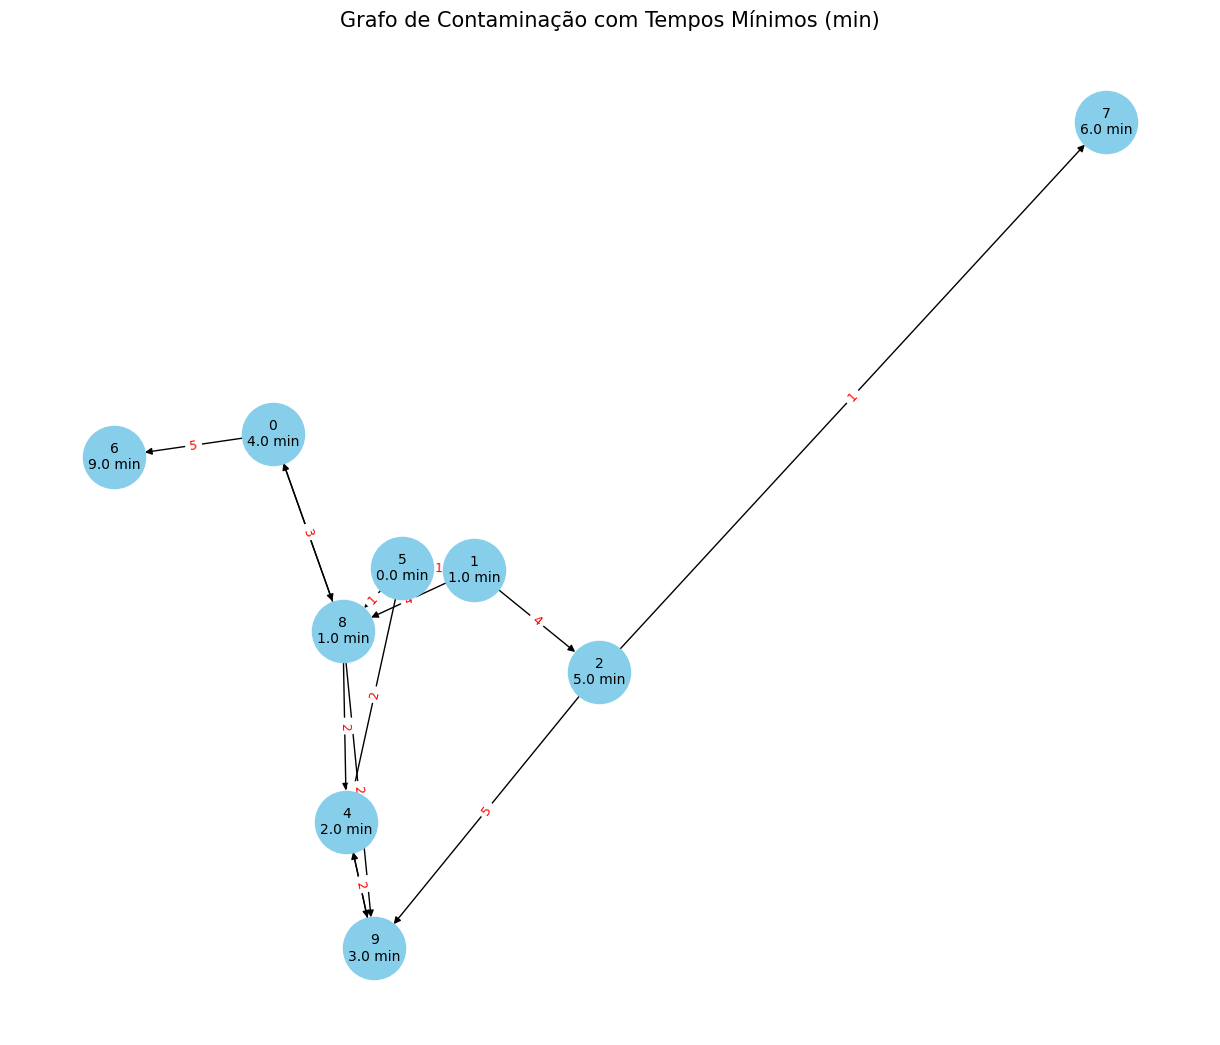

In [ ]:
# Plotar grafo
G = nx.DiGraph()
for node in random_complex_graph:
    for neighbor, weight in random_complex_graph[node]:
        G.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G, seed=42)

edge_labels = nx.get_edge_attributes(G, 'weight')
node_labels = {node: f"{node}\n{contamination_times_random[0][node]:.1f} min" for node in G.nodes()}

plt.figure(figsize=(12, 10)) # Aumenta o tamanho da figura
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=2000, font_weight='bold', arrows=True) # Aumenta o tamanho do nó e adiciona setas
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10) # Ajusta o tamanho da fonte para os rótulos
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9) # Adiciona rótulos de aresta com cor e tamanho
plt.title("Grafo de Contaminação com Tempos Mínimos (min)", size=15) # Aumenta o tamanho do título
plt.axis('off')
plt.show()

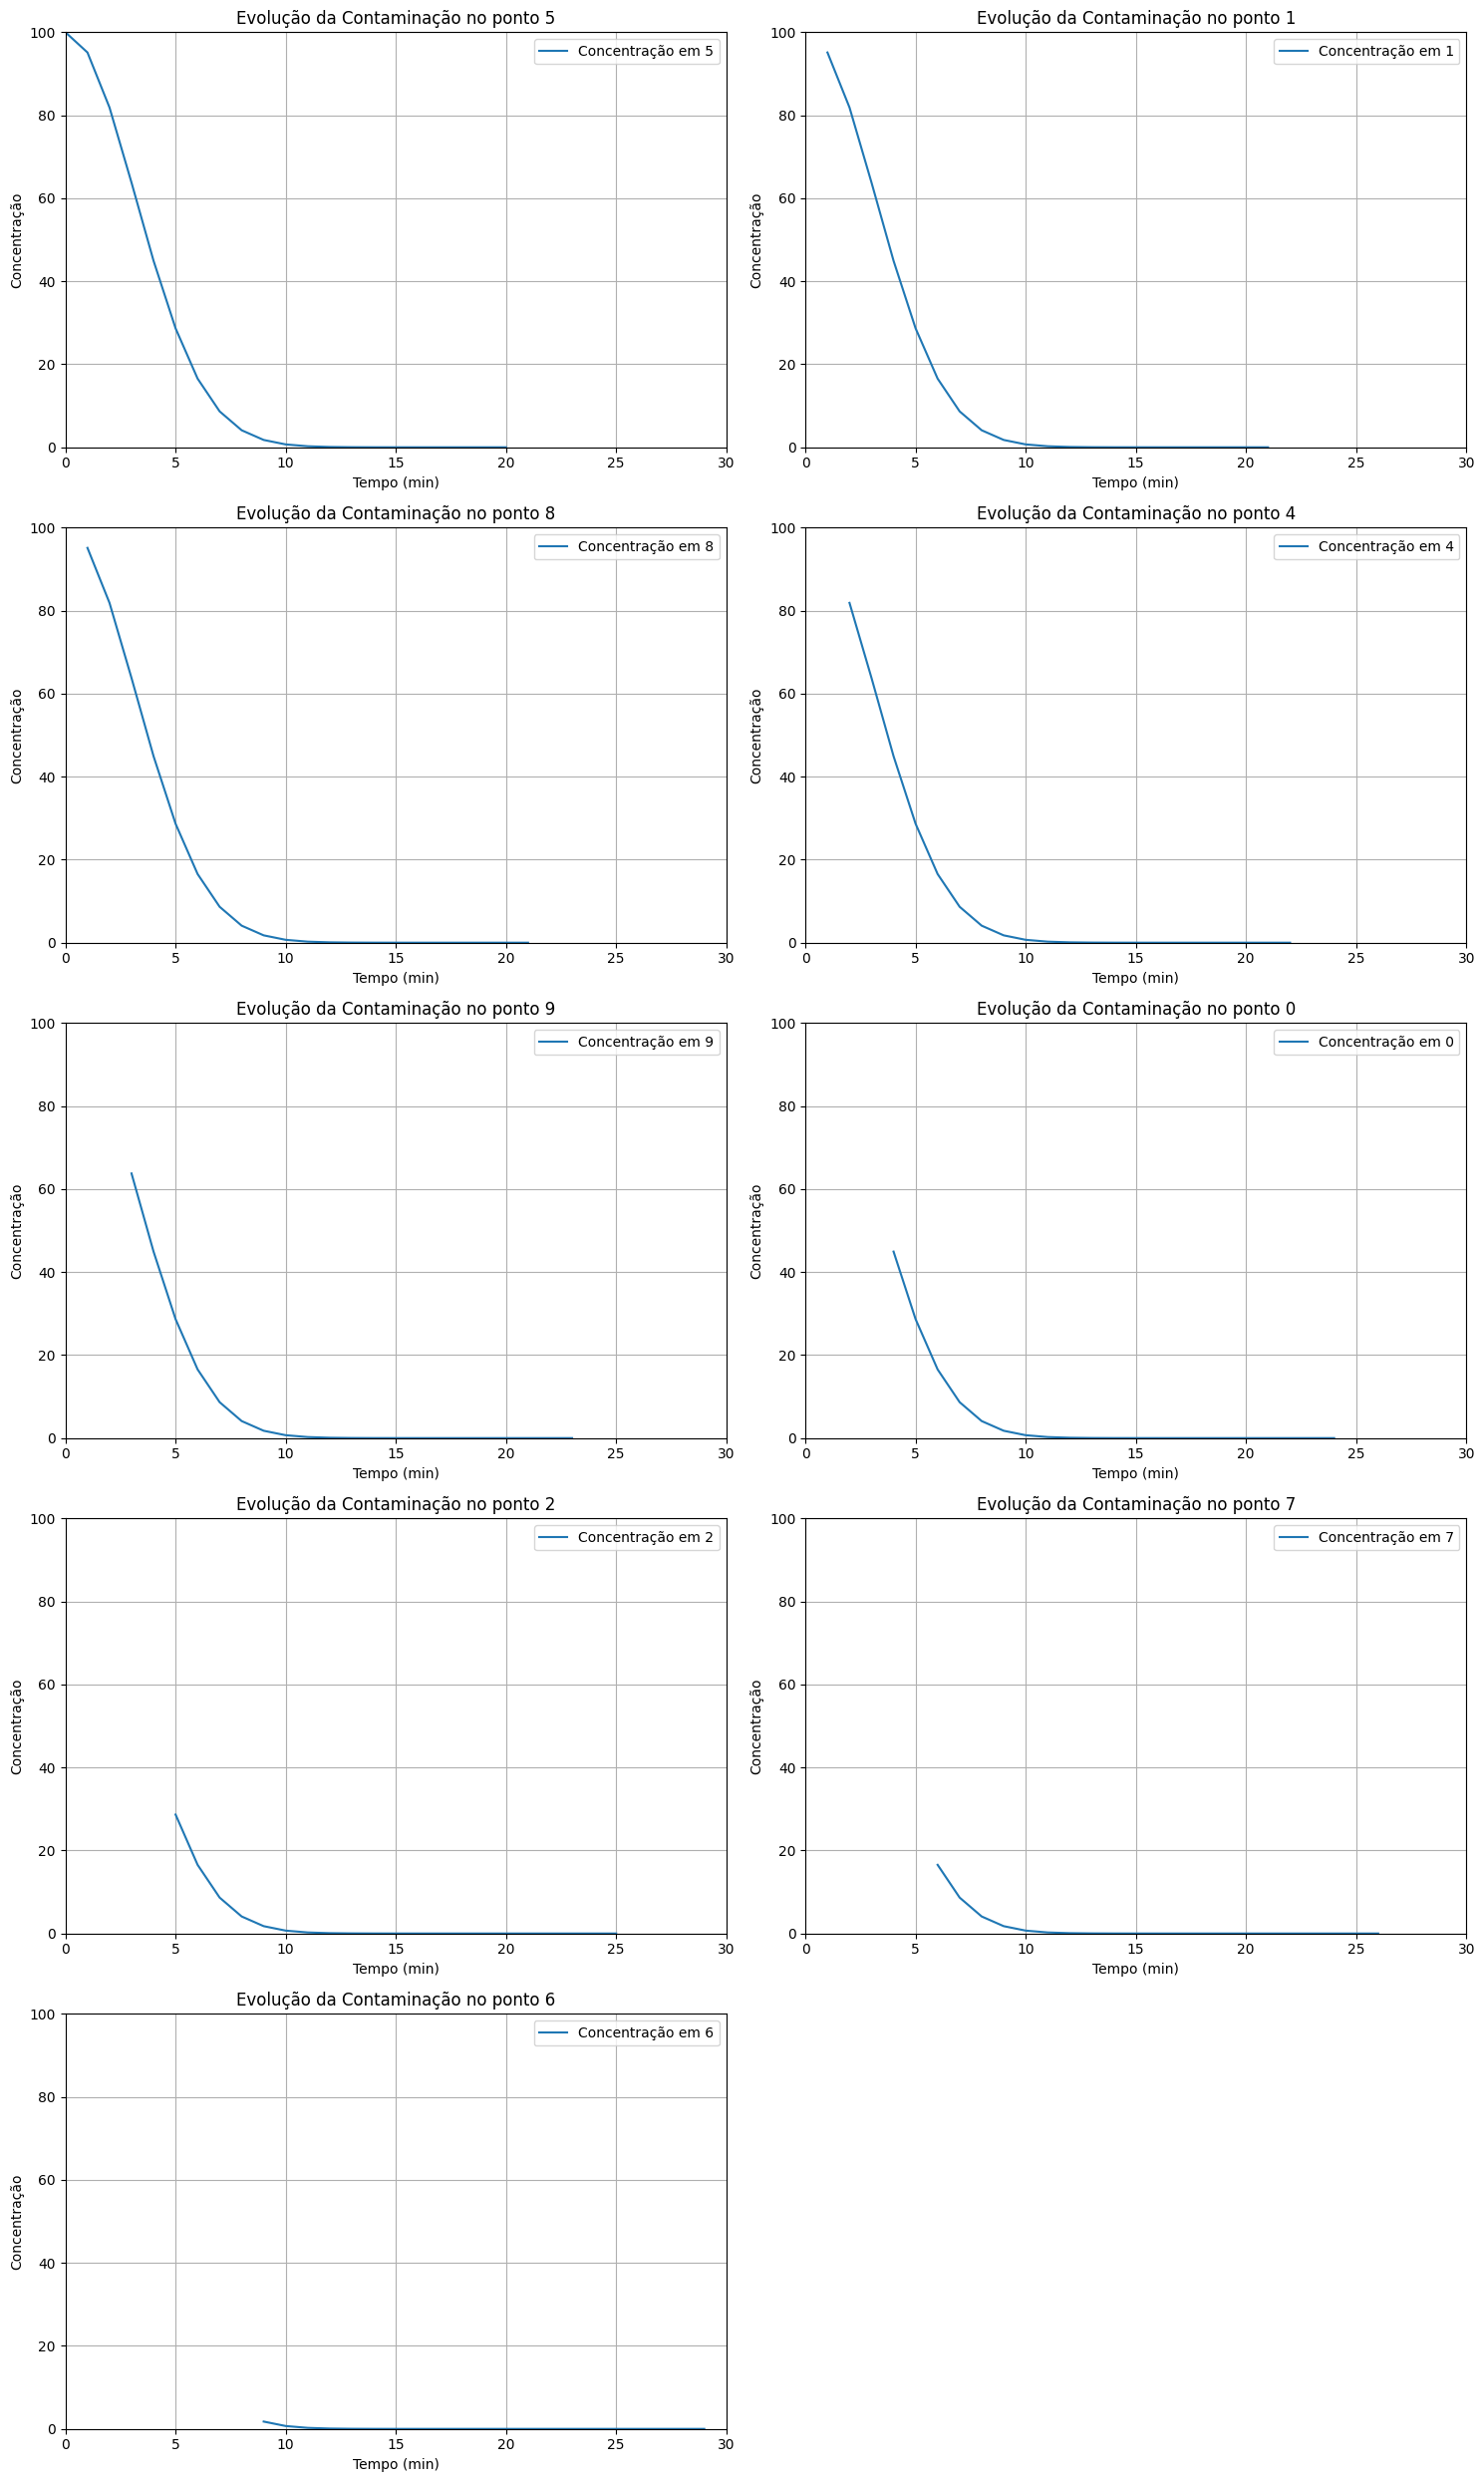

In [ ]:
num_rows = 5
num_cols = 2
# Usa o número de nós do grafo gerado aleatoriamente para o layout dos plots
num_plots = len(random_complex_graph.keys())
# Ajusta o número de linhas com base no número de plots
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axs_flat = axs.flatten()

plot_index = 0

# Executa Dijkstra novamente para obter predecessores e tempos de chegada
contamination_times_dict, predecessors_dict = dijkstra_with_predecessors(random_complex_graph, source_node)

# Dicionário para armazenar o histórico de contaminação (ts, Cs) para cada nó
contamination_histories = {}

# Itera por cada nó no random_complex_graph, simulando na ordem do tempo de chegada
# Isso ajuda a garantir que, ao simular um nó, seu predecessor no caminho mais curto já tenha sido simulado
sorted_nodes = sorted(random_complex_graph.keys(), key=lambda node: contamination_times_dict[node])

for node in sorted_nodes:
    ax = axs_flat[plot_index]

    arrival_time = contamination_times_dict[node]

    # Processa apenas se o nó for alcançável a partir da origem (arrival_time não é infinito)
    if arrival_time != float('inf'):
        point = node

        # Determina o nível de contaminação inicial (y0) e o tempo de início (t0) para a simulação
        predecessor = predecessors_dict[node]
        if predecessor is None:
            # Este é o nó de origem
            y0 = 100  # Contaminação inicial na origem
            t0 = 0 # Simulação para o nó de origem começa no tempo 0
        else:
            # Este é um nó subsequente, a contaminação vem do predecessor no caminho mais curto
            t0 = arrival_time # Simulação para este nó começa no seu tempo de chegada

            # Precisamos do nível de contaminação do predecessor *no tempo de chegada* no nó atual.
            # Obtém o histórico de contaminação do predecessor
            predecessor_ts, predecessor_Cs = contamination_histories.get(predecessor, ([], []))

            # Encontra o nível de contaminação do predecessor no arrival_time.
            # Precisamos interpolar o nível de contaminação a partir do histórico do predecessor.
            # Se o tempo de chegada estiver exatamente no histórico do predecessor, usa esse valor.
            # Caso contrário, encontra o ponto de tempo mais próximo no histórico e usa seu valor (uma simplificação).
            # Uma abordagem mais precisa seria a interpolação linear entre os dois pontos mais próximos.

            y0_predecessor = 0.0 # Padrão para 0 se o histórico do predecessor não estiver disponível ou o tempo de chegada for antes do início do histórico
            if predecessor_ts and arrival_time >= predecessor_ts[0]:
                 # Encontra o índice em predecessor_ts mais próximo de arrival_time
                 closest_time_index = np.argmin(np.abs(np.array(predecessor_ts) - arrival_time))

                 # Usa o nível de contaminação no ponto de tempo mais próximo
                 y0_predecessor = predecessor_Cs[closest_time_index]


            y0 = y0_predecessor

        # Simula a propagação da contaminação a partir de y0 começando em t0
        # Simula por uma duração fixa após a chegada, ou até que a contaminação seja muito baixa
        # Vamos simular por 20 minutos após a chegada, como antes.
        tf = t0 + 20
        h = 1

        # Simula e plota apenas se y0 for maior que um pequeno limiar
        if y0 > 1e-9:
            ts, Cs, final_y = runge_kutta_4(contamination_model, y0, t0, tf, h)

            # Armazena o histórico de contaminação para este nó
            contamination_histories[node] = (ts, Cs)

            ax.plot(ts, Cs, label=f'Concentração em {point}')
            ax.set_xlabel("Tempo (min)")
            ax.set_ylabel("Concentração")
            ax.set_title(f"Evolução da Contaminação no ponto {point}")
            ax.set_ylim(0, 100) # Mantém o limite Y fixo para consistência
            ax.set_xlim(0, 30)
            ax.grid(True)
            ax.legend()

        else:
             # Se y0 for efetivamente 0, a contaminação não se propaga para este nó por este caminho
             ax.text(0.5, 0.5, f'Ponto {node} não contaminado via caminho mais curto', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
             ax.set_title(f"Evolução da Contaminação no ponto {node}")
             ax.axis('off')
             contamination_histories[node] = ([], []) # Armazena histórico vazio


        plot_index += 1 # Avança para o próximo subplot
    else:
        # Se o nó não for alcançável, podemos pular o plot ou plotar uma mensagem
        ax.text(0.5, 0.5, f'Ponto {node} não alcançado', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f"Evolução da Contaminação no ponto {node}")
        ax.axis('off')
        contamination_histories[node] = ([], []) # Armazena histórico vazio

# Oculta quaisquer subplots não utilizados
for i in range(plot_index, len(axs_flat)):
    fig.delaxes(axs_flat[i])

plt.tight_layout()
plt.show()